<h1><bold>CS374 - Computational and Numerical Methods Lab 2</bold></h1>

```
Vraj Gandhi        -  202201425
Kaushik Prajapati  -  202201472
```

<h2>Bisection Method:</h2>
<p> Basic library importing for ploting, styling and table creation.

In [1]:
import numpy as np
import math as mt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<p align='justify'> Implementing polynomial class with root finding algorithm. It has a function named 'find_roots' and 'plot' to find the root of the polynomial and plot the graph of the function. Internally it uses bisection method to find the root for the function in given range. Also the function prints the calculation table for better clarification.

In [2]:
class polynomial:

    def __init__(self, function, accuracy = 1e-9) -> None:
        self.function = function
        self.epsilon = accuracy

    def method_of_bisection(self, low, high):

        lval = self.function(low)
        hval = self.function(high)

        if lval * hval > 0:
            print(f"No root between {low} and {high}")
            return None

        data = []
        index = 1
        while (high-low) >= self.epsilon:

            mid = (low + high) / 2
            lval = self.function(low)
            mval = self.function(mid)
            hval = self.function(high)
            data_element = [index, low, high, mid, high-mid, mval]
            index += 1
            if lval * mval <= 0:
                high = mid
            elif mval * hval <= 0:
                low = mid
            else:
                return None
            data.append(data_element)
        print("Calculation Table:\n")
        self.df = pd.DataFrame(data, columns = ["Index", "An", "Bn", "C", "Bn-C", "F(C)"])
        display(self.df)
        return (low + high) / 2

    def find_roots(self, a, b, method = 'None'):

        root = None
        match method:
            case "bisect":
                root = self.method_of_bisection(a, b)
            case _:
                root = self.method_of_bisection(a, b)
        if root is None:
            return None
        return np.round(root, 8)

    def plot(self, low=-10, high=10, xlimit = (-10, 10), ylimit = (-10, 10), figno=1):

        x = np.arange(low, high, 0.01)
        y = self.function(x)

        plt.figure(figno)
        plt.plot(x, y, label="y = f(x)")
        plt.xlabel("x-axis")
        plt.ylabel("y-axis")
        plt.xlim(xlimit)
        plt.ylim(ylimit)
        plt.title("Plot for the function y = f(x)")
        plt.grid()
        plt.show()

    def converence_plot(self, root, xlimit = (-10, 10), ylimit = (-10, 10)):

        a_values = list(self.df["An"])
        fa_values = [self.function(val) for val in a_values]

        b_values = list(self.df["Bn"])
        fb_values = [self.function(val) for val in b_values]

        # plt.figure(figsize=(10, 6))
        plt.plot(a_values, fa_values, 'o', label='An Points', color='blue', markersize=6, markerfacecolor='red')
        plt.plot(b_values, fb_values, 'o', label='Bn Points', color='orange', markersize=6, markerfacecolor='green')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.xlim(xlimit)
        plt.ylim(ylimit)
        plt.title('Convergence of Points (An, Bn) to a Particular Point')
        plt.grid()
        plt.legend()
        plt.show()

        iterations = np.array(self.df.index)
        aprx_error = np.array(self.df["Bn-C"])
        error = abs(np.array(self.df["C"]) - root)
        plt.plot(iterations, aprx_error, label='Approx Error')
        plt.plot(iterations, error, label='Actual Error')
        plt.xlabel('Iterations')
        plt.ylabel('Error')
        plt.title('Error v/s Iteration')
        plt.grid()
        plt.legend()
        plt.show()


<h3>Question-1</h3>
1. Write a code, applying the algorithm of the bisection method to determine both
the real roots of $ F(x) = x^{6} - x - 1 $.

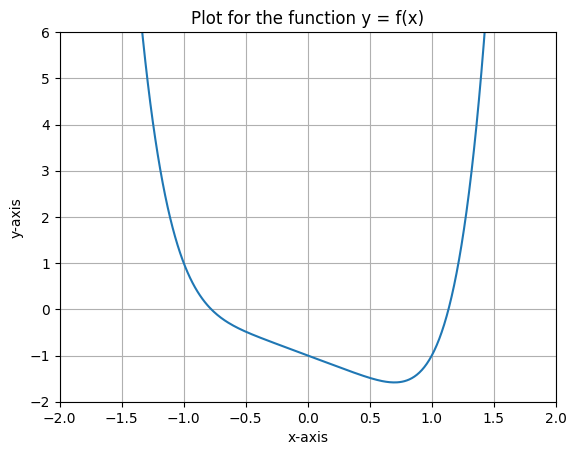

Calculation Table:



Index        An        Bn         C      Bn-C      F(C)
0      1  1.000000  2.000000  1.500000  0.500000  8.890625
1      2  1.000000  1.500000  1.250000  0.250000  1.564697
2      3  1.000000  1.250000  1.125000  0.125000 -0.097713
3      4  1.125000  1.250000  1.187500  0.062500  0.616653
4      5  1.125000  1.187500  1.156250  0.031250  0.233269
5      6  1.125000  1.156250  1.140625  0.015625  0.061578
6      7  1.125000  1.140625  1.132812  0.007812 -0.019576
7      8  1.132812  1.140625  1.136719  0.003906  0.020619
8      9  1.132812  1.136719  1.134766  0.001953  0.000427
9     10  1.132812  1.134766  1.133789  0.000977 -0.009598

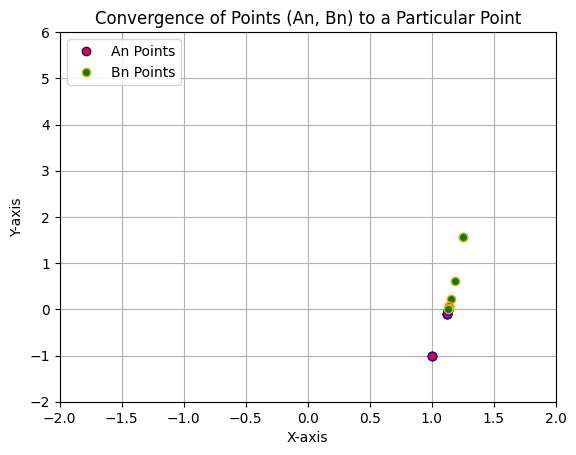


Root = 1.13427734


In [3]:
p = polynomial(function = lambda x: x**6 - x - 1, accuracy=0.001)
p.plot(xlimit=(-2, 2), ylimit=(-2, 6))
root = p.find_roots(a=1, b=2, method='bisect')
p.converence_plot(root=root, xlimit=(-2, 2), ylimit=(-2, 6))
print(f"\nRoot = {root}")

<h3>Question-2</h3>
1. Numerically implement the bisection algorithm to find the roots of the following equations. Use an error tolerance of 0.0001.


(a) The real root of $x^{3}-x^{2}-x-1$

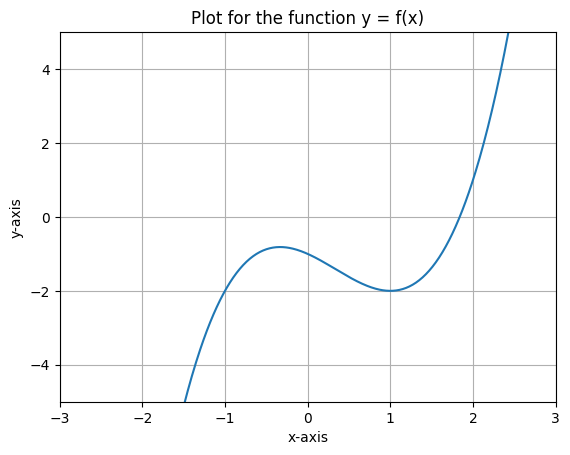

Calculation Table:



Index        An        Bn         C      Bn-C      F(C)
0       1  1.000000  2.000000  1.500000  0.500000 -1.375000
1       2  1.500000  2.000000  1.750000  0.250000 -0.453125
2       3  1.750000  2.000000  1.875000  0.125000  0.201172
3       4  1.750000  1.875000  1.812500  0.062500 -0.143311
4       5  1.812500  1.875000  1.843750  0.031250  0.024506
5       6  1.812500  1.843750  1.828125  0.015625 -0.060497
6       7  1.828125  1.843750  1.835938  0.007812 -0.018271
7       8  1.835938  1.843750  1.839844  0.003906  0.003048
8       9  1.835938  1.839844  1.837891  0.001953 -0.007629
9      10  1.837891  1.839844  1.838867  0.000977 -0.002294
10     11  1.838867  1.839844  1.839355  0.000488  0.000376
11     12  1.838867  1.839355  1.839111  0.000244 -0.000960
12     13  1.839111  1.839355  1.839233  0.000122 -0.000292
13     14  1.839233  1.839355  1.839294  0.000061  0.000042

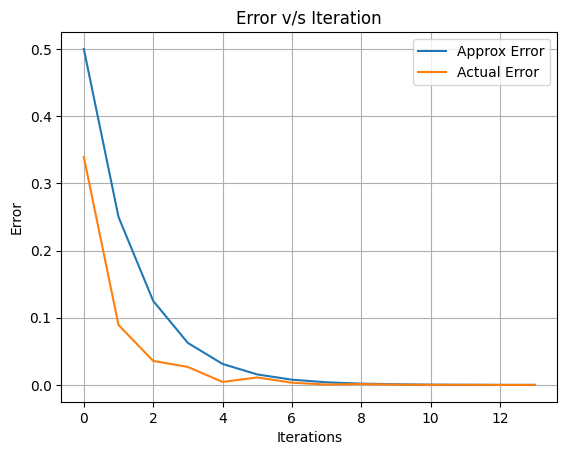


Root = 1.83926392


In [4]:
p = polynomial(function = lambda x: x**3 - x**2 - x - 1, accuracy=0.0001)
p.plot(xlimit=(-3, 3), ylimit=(-5, 5))
root = p.find_roots(a=1, b=2, method='bisect')
p.converence_plot(root=root, xlimit=(-3, 3), ylimit=(-5, 5))
print(f"\nRoot = {root}")

(b) The real root of $x = 1 + 0.3cos(x)$

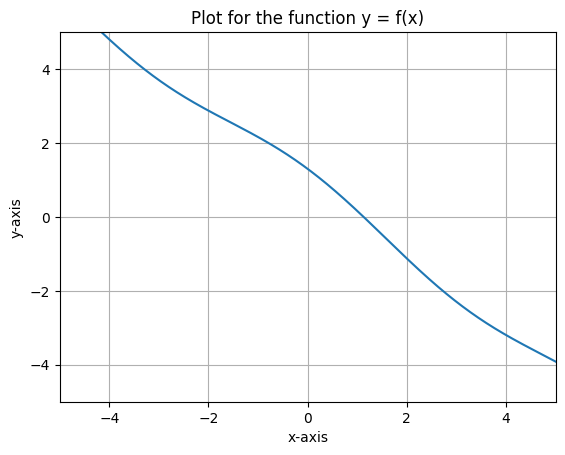

Calculation Table:



Index        An        Bn         C      Bn-C      F(C)
0       1 -2.000000  2.000000  0.000000  2.000000  1.300000
1       2  0.000000  2.000000  1.000000  1.000000  0.162091
2       3  1.000000  2.000000  1.500000  0.500000 -0.478779
3       4  1.000000  1.500000  1.250000  0.250000 -0.155403
4       5  1.000000  1.250000  1.125000  0.125000  0.004353
5       6  1.125000  1.250000  1.187500  0.062500 -0.075306
6       7  1.125000  1.187500  1.156250  0.031250 -0.035418
7       8  1.125000  1.156250  1.140625  0.015625 -0.015517
8       9  1.125000  1.140625  1.132812  0.007812 -0.005578
9      10  1.125000  1.132812  1.128906  0.003906 -0.000612
10     11  1.125000  1.128906  1.126953  0.001953  0.001871
11     12  1.126953  1.128906  1.127930  0.000977  0.000630
12     13  1.127930  1.128906  1.128418  0.000488  0.000009
13     14  1.128418  1.128906  1.128662  0.000244 -0.000301
14     15  1.128418  1.128662  1.128540  0.000122 -0.000146
15     16  1.128418  1.128540  1.128479  0.000061 -0.000069

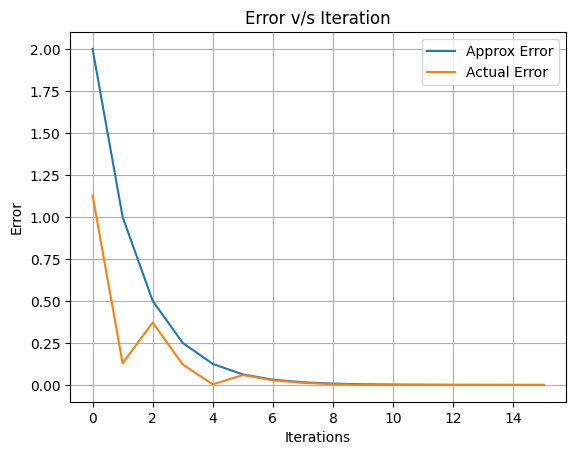


Root = 1.12844849


In [5]:
p = polynomial(function = lambda x: 1 + 0.3 * np.cos(x)-x, accuracy=0.0001)
p.plot(xlimit=(-5, 5), ylimit=(-5, 5))
root = p.find_roots(a=-2, b=2, method='bisect')
p.converence_plot(root=root, xlimit=(-5, 5), ylimit=(-5, 5))
print(f"\nRoot = {root}")


(c) The smallest positive root of $cos(x) = \frac{1}{2} + sin(x)$

Calculation Table:



Index        An        Bn         C      Bn-C      F(C)
0       1  0.000000  1.000000  0.500000  0.500000  0.101843
1       2  0.000000  0.500000  0.250000  0.250000 -0.221508
2       3  0.250000  0.500000  0.375000  0.125000 -0.064235
3       4  0.375000  0.500000  0.437500  0.062500  0.017863
4       5  0.375000  0.437500  0.406250  0.031250 -0.023442
5       6  0.406250  0.437500  0.421875  0.015625 -0.002851
6       7  0.421875  0.437500  0.429688  0.007812  0.007491
7       8  0.421875  0.429688  0.425781  0.003906  0.002316
8       9  0.421875  0.425781  0.423828  0.001953 -0.000268
9      10  0.423828  0.425781  0.424805  0.000977  0.001024
10     11  0.423828  0.424805  0.424316  0.000488  0.000378
11     12  0.423828  0.424316  0.424072  0.000244  0.000055
12     13  0.423828  0.424072  0.423950  0.000122 -0.000107
13     14  0.423950  0.424072  0.424011  0.000061 -0.000026

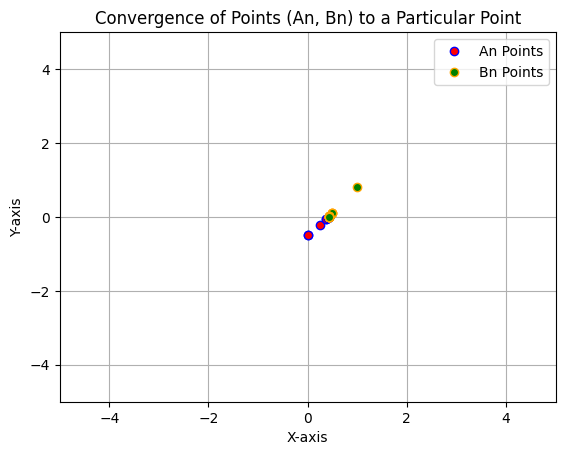


Root = 0.42404175


In [6]:
p = polynomial(function = lambda x: 0.5 + np.sin(x) - np.cos(x), accuracy=0.0001)
p.plot(xlimit=(-5, 5), ylimit=(-5, 5))
root = p.find_roots(a=0, b=1, method='bisect')
p.converence_plot(root=root, xlimit=(-5, 5), ylimit=(-5, 5))
print(f"\nRoot = {root}")

(d) The root of $x = e^{-x}$.

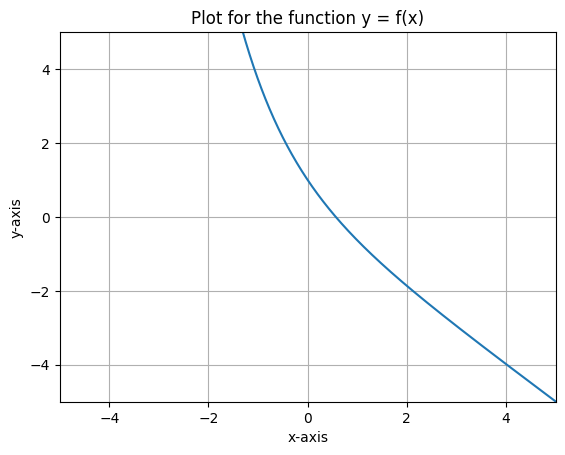

Calculation Table:



Index        An        Bn         C      Bn-C      F(C)
0       1  0.000000  2.000000  1.000000  1.000000 -0.632121
1       2  0.000000  1.000000  0.500000  0.500000  0.106531
2       3  0.500000  1.000000  0.750000  0.250000 -0.277633
3       4  0.500000  0.750000  0.625000  0.125000 -0.089739
4       5  0.500000  0.625000  0.562500  0.062500  0.007283
5       6  0.562500  0.625000  0.593750  0.031250 -0.041498
6       7  0.562500  0.593750  0.578125  0.015625 -0.017176
7       8  0.562500  0.578125  0.570312  0.007812 -0.004964
8       9  0.562500  0.570312  0.566406  0.003906  0.001155
9      10  0.566406  0.570312  0.568359  0.001953 -0.001905
10     11  0.566406  0.568359  0.567383  0.000977 -0.000375
11     12  0.566406  0.567383  0.566895  0.000488  0.000390
12     13  0.566895  0.567383  0.567139  0.000244  0.000007
13     14  0.567139  0.567383  0.567261  0.000122 -0.000184
14     15  0.567139  0.567261  0.567200  0.000061 -0.000088

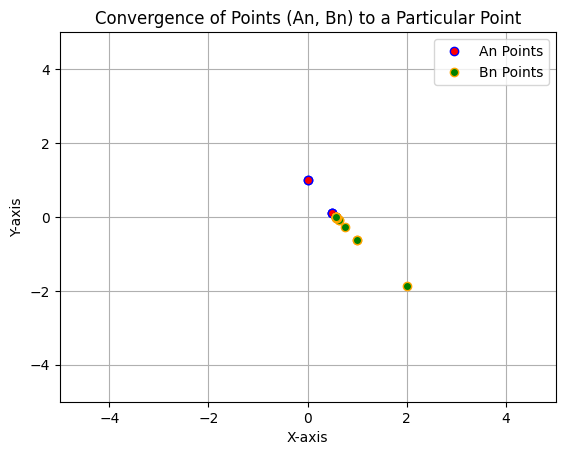


Root = 0.56716919


In [7]:
p = polynomial(function = lambda x: np.exp(-x) - x, accuracy=0.0001)
p.plot(xlimit=(-5, 5), ylimit=(-5, 5))
root = p.find_roots(a=0, b=2, method='bisect')
p.converence_plot(root=root, xlimit=(-5, 5), ylimit=(-5, 5))
print(f"\nRoot = {root}")

(e) The smallest positive root of $e^{-x} = sin(x)$.

Calculation Table:



Index        An        Bn         C      Bn-C      F(C)
0       1  0.000000  1.000000  0.500000  0.500000 -0.127105
1       2  0.500000  1.000000  0.750000  0.250000  0.209272
2       3  0.500000  0.750000  0.625000  0.125000  0.049836
3       4  0.500000  0.625000  0.562500  0.062500 -0.036480
4       5  0.562500  0.625000  0.593750  0.031250  0.007221
5       6  0.562500  0.593750  0.578125  0.015625 -0.014495
6       7  0.578125  0.593750  0.585938  0.007812 -0.003603
7       8  0.585938  0.593750  0.589844  0.003906  0.001817
8       9  0.585938  0.589844  0.587891  0.001953 -0.000891
9      10  0.587891  0.589844  0.588867  0.000977  0.000464
10     11  0.587891  0.588867  0.588379  0.000488 -0.000213
11     12  0.588379  0.588867  0.588623  0.000244  0.000125
12     13  0.588379  0.588623  0.588501  0.000122 -0.000044
13     14  0.588501  0.588623  0.588562  0.000061  0.000041

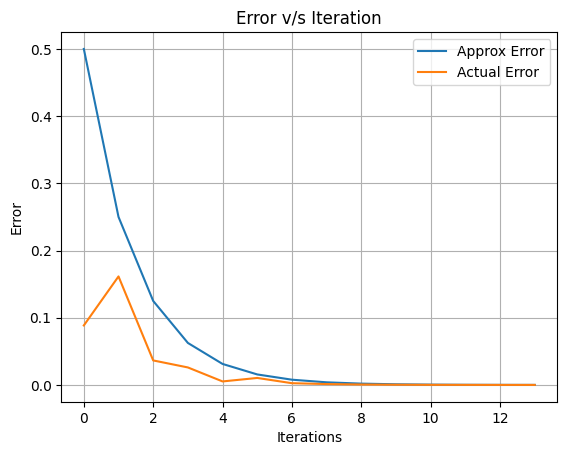


Root = 0.58853149


In [8]:
p = polynomial(function = lambda x: np.sin(x) - np.exp(-x), accuracy=0.0001)
p.plot(high=20, xlimit=(-2, 20), ylimit=(-8, 5))
root = p.find_roots(a=0, b=1, method='bisect')
p.converence_plot(root=root, xlimit=(-2, 20), ylimit=(-8, 5))
print(f"\nRoot = {root}")

(f) The real root of $x^{3}-2x-2=0$.

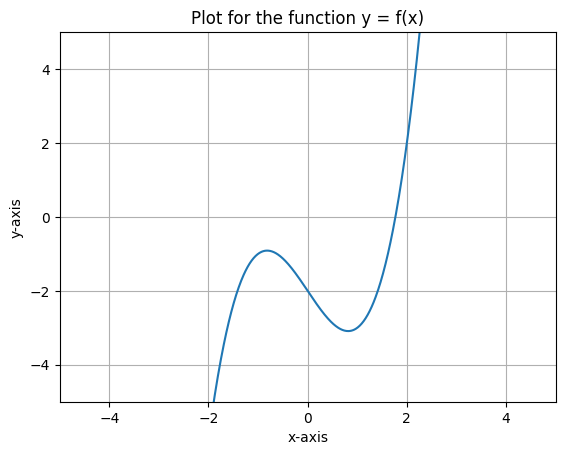

Calculation Table:



Index        An        Bn         C      Bn-C      F(C)
0       1  0.000000  2.000000  1.000000  1.000000 -3.000000
1       2  1.000000  2.000000  1.500000  0.500000 -1.625000
2       3  1.500000  2.000000  1.750000  0.250000 -0.140625
3       4  1.750000  2.000000  1.875000  0.125000  0.841797
4       5  1.750000  1.875000  1.812500  0.062500  0.329346
5       6  1.750000  1.812500  1.781250  0.031250  0.089142
6       7  1.750000  1.781250  1.765625  0.015625 -0.027035
7       8  1.765625  1.781250  1.773438  0.007812  0.030729
8       9  1.765625  1.773438  1.769531  0.003906  0.001766
9      10  1.765625  1.769531  1.767578  0.001953 -0.012655
10     11  1.767578  1.769531  1.768555  0.000977 -0.005449
11     12  1.768555  1.769531  1.769043  0.000488 -0.001843
12     13  1.769043  1.769531  1.769287  0.000244 -0.000039
13     14  1.769287  1.769531  1.769409  0.000122  0.000864
14     15  1.769287  1.769409  1.769348  0.000061  0.000412

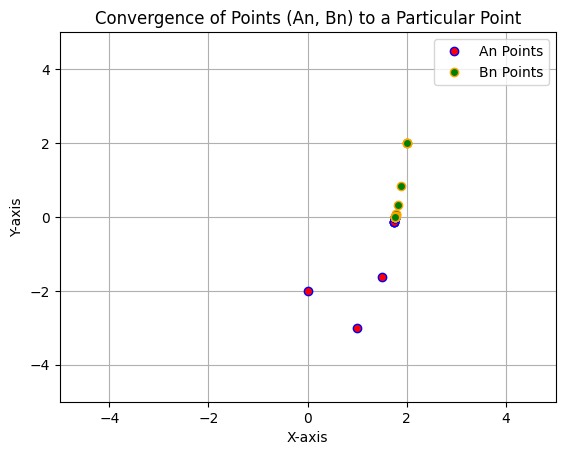

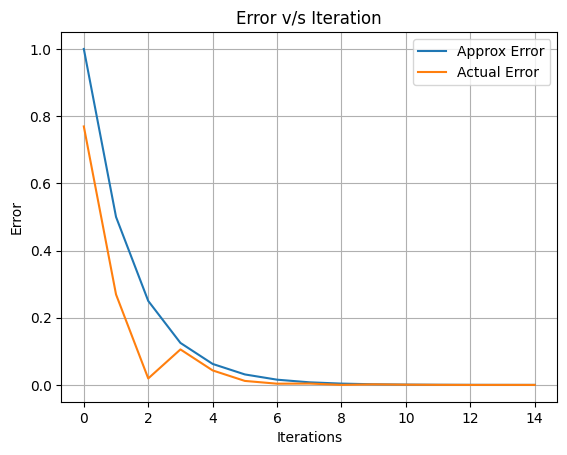


Root = 1.76931763


In [9]:
p = polynomial(function = lambda x: x**3 - 2*x - 2, accuracy=0.0001)
p.plot(high=20, xlimit=(-5, 5), ylimit=(-5, 5))
root = p.find_roots(a=0, b=2, method='bisect')
p.converence_plot(root=root, xlimit=(-5, 5), ylimit=(-5, 5))
print(f"\nRoot = {root}")

(g) All real roots of $x^{4}-x-1=0$.

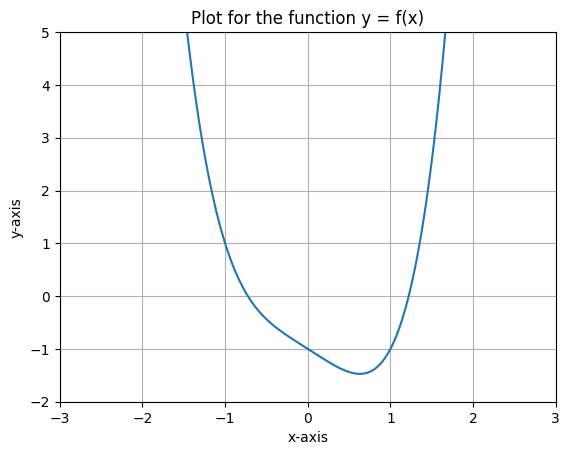

Calculation Table:



Index        An        Bn         C      Bn-C      F(C)
0       1 -2.000000  0.000000 -1.000000  1.000000  1.000000
1       2 -1.000000  0.000000 -0.500000  0.500000 -0.437500
2       3 -1.000000 -0.500000 -0.750000  0.250000  0.066406
3       4 -0.750000 -0.500000 -0.625000  0.125000 -0.222412
4       5 -0.750000 -0.625000 -0.687500  0.062500 -0.089096
5       6 -0.750000 -0.687500 -0.718750  0.031250 -0.014373
6       7 -0.750000 -0.718750 -0.734375  0.015625  0.025227
7       8 -0.734375 -0.718750 -0.726562  0.007812  0.005234
8       9 -0.726562 -0.718750 -0.722656  0.003906 -0.004617
9      10 -0.726562 -0.722656 -0.724609  0.001953  0.000296
10     11 -0.724609 -0.722656 -0.723633  0.000977 -0.002164
11     12 -0.724609 -0.723633 -0.724121  0.000488 -0.000935
12     13 -0.724609 -0.724121 -0.724365  0.000244 -0.000319
13     14 -0.724609 -0.724365 -0.724487  0.000122 -0.000012
14     15 -0.724609 -0.724487 -0.724548  0.000061  0.000142

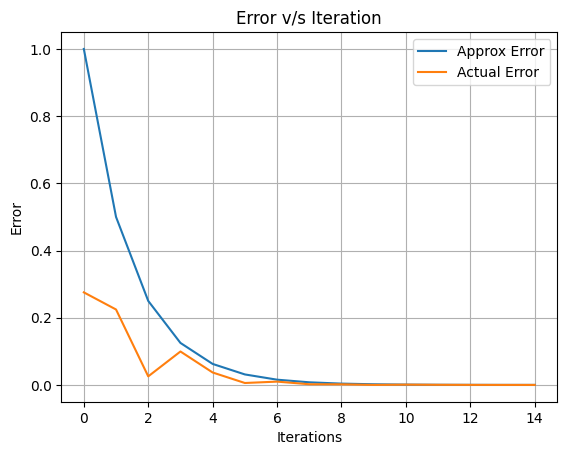


First Root = -0.72451782

Calculation Table:



Index        An        Bn         C      Bn-C      F(C)
0       1  0.000000  2.000000  1.000000  1.000000 -1.000000
1       2  1.000000  2.000000  1.500000  0.500000  2.562500
2       3  1.000000  1.500000  1.250000  0.250000  0.191406
3       4  1.000000  1.250000  1.125000  0.125000 -0.523193
4       5  1.125000  1.250000  1.187500  0.062500 -0.198959
5       6  1.187500  1.250000  1.218750  0.031250 -0.012481
6       7  1.218750  1.250000  1.234375  0.015625  0.087231
7       8  1.218750  1.234375  1.226562  0.007812  0.036824
8       9  1.218750  1.226562  1.222656  0.003906  0.012035
9      10  1.218750  1.222656  1.220703  0.001953 -0.000257
10     11  1.220703  1.222656  1.221680  0.000977  0.005880
11     12  1.220703  1.221680  1.221191  0.000488  0.002809
12     13  1.220703  1.221191  1.220947  0.000244  0.001276
13     14  1.220703  1.220947  1.220825  0.000122  0.000509
14     15  1.220703  1.220825  1.220764  0.000061  0.000126

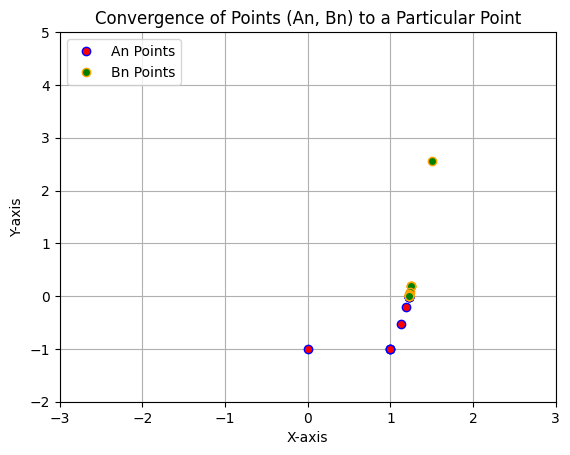

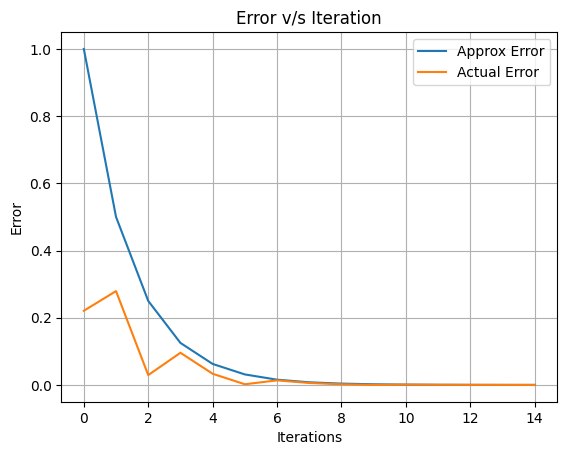


Second Root = 1.22073364


In [10]:
p = polynomial(function = lambda x: x**4 - x - 1, accuracy=0.0001)
p.plot(high=20, xlimit=(-3, 3), ylimit=(-2, 5))
root1 = p.find_roots(a=-2, b=0, method='bisect')
p.converence_plot(root=root1, xlimit=(-3, 3), ylimit=(-2, 5))
print(f"\nFirst Root = {root1}\n")
root2 = p.find_roots(a=0, b=2, method='bisect')
p.converence_plot(root=root2, xlimit=(-3, 3), ylimit=(-2, 5))
print(f"\nSecond Root = {root2}")

2. To help determine the roots of $x = tan(x)$, graph $y = x$ and $y = tan(x)$, and look at the intersection points of the two curves.


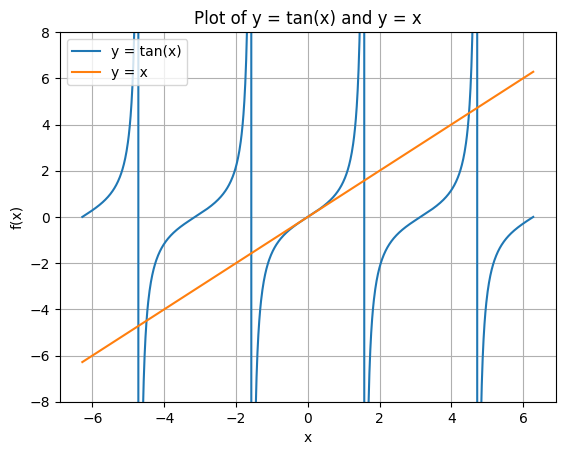

In [11]:
low, high = -2 * np.pi, 2 * np.pi
x = np.linspace(low, high, 1000)
f = np.tan(x)

plt.plot(x, f, label='y = tan(x)')
plt.plot(x, x, label='y = x')
plt.ylim(-8, 8)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of y = tan(x) and y = x')
plt.grid(True)
plt.legend()
plt.show()

(a) Find the smallest nonzero positive root of $x = tan(x)$, with an accuracy of 0.0001.

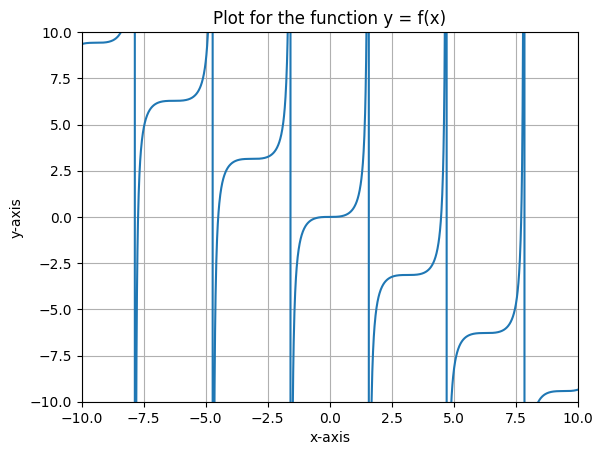

Calculation Table:



Index        An        Bn         C      Bn-C      F(C)
0       1  4.000000  4.500000  4.250000  0.250000 -2.243691
1       2  4.250000  4.500000  4.375000  0.125000 -1.524388
2       3  4.375000  4.500000  4.437500  0.062500 -0.891762
3       4  4.437500  4.500000  4.468750  0.031250 -0.445853
4       5  4.468750  4.500000  4.484375  0.015625 -0.174948
5       6  4.484375  4.500000  4.492188  0.007812 -0.024531
6       7  4.492188  4.500000  4.496094  0.003906  0.054892
7       8  4.492188  4.496094  4.494141  0.001953  0.014814
8       9  4.492188  4.494141  4.493164  0.000977 -0.004949
9      10  4.493164  4.494141  4.493652  0.000488  0.004910
10     11  4.493164  4.493652  4.493408  0.000244 -0.000025
11     12  4.493408  4.493652  4.493530  0.000122  0.002441
12     13  4.493408  4.493530  4.493469  0.000061  0.001207

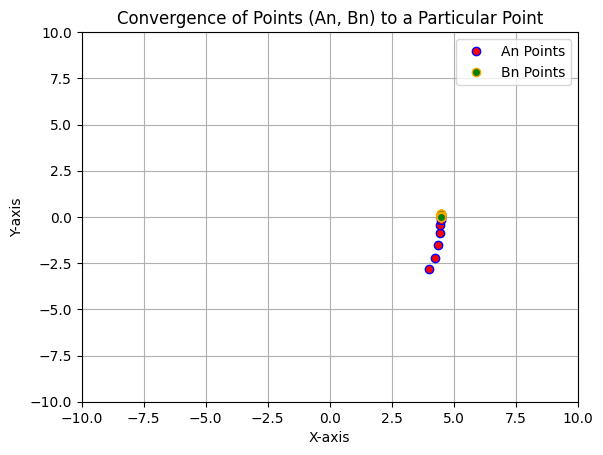

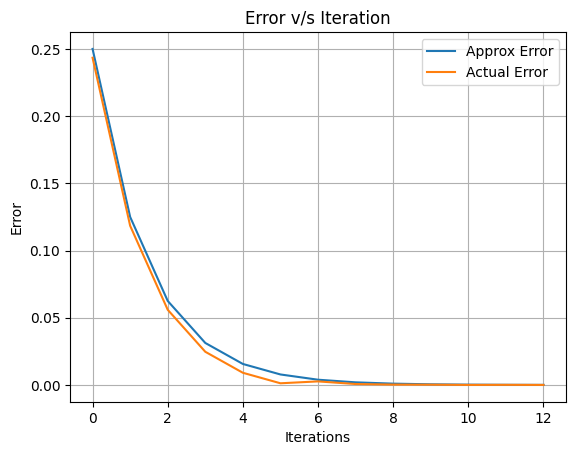


Root greater than pi/2 = 4.49343872



In [12]:
p = polynomial(function = lambda x: np.tan(x) - x, accuracy=0.0001)
p.plot(high=20, xlimit=(-10, 10), ylimit=(-10, 10))
root = p.find_roots(a=4, b=4.5, method='bisect')
p.converence_plot(root=root, xlimit=(-10, 10), ylimit=(-10, 10))
print(f"\nRoot greater than pi/2 = {root}\n")

(b) Solve $x = tan(x)$ for the root that is closest to $x=100$.

Calculation Table:



Index         An          Bn          C      Bn-C          F(C)
0       1  98.959000  100.000000  99.479500  0.520500   -101.228747
1       2  98.959000   99.479500  99.219250  0.260250   -102.992291
2       3  98.959000   99.219250  99.089125  0.130125   -106.800650
3       4  98.959000   99.089125  99.024062  0.065062   -114.653702
4       5  98.959000   99.024062  98.991531  0.032531   -130.866125
5       6  98.959000   98.991531  98.975266  0.016266   -165.208397
6       7  98.959000   98.975266  98.967133  0.008133   -242.555819
7       8  98.959000   98.967133  98.963066  0.004066   -444.049315
8       9  98.959000   98.963066  98.961033  0.002033  -1255.544827
9      10  98.959000   98.961033  98.960017  0.001017   6480.570975
10     11  98.960017   98.961033  98.960525  0.000508  -2905.471673
11     12  98.960017   98.960525  98.960271  0.000254  -9887.155953
12     13  98.960017   98.960271  98.960144  0.000127  40043.431853
13     14  98.960144   98.960271  98.960207  0.000064 -25988.071915

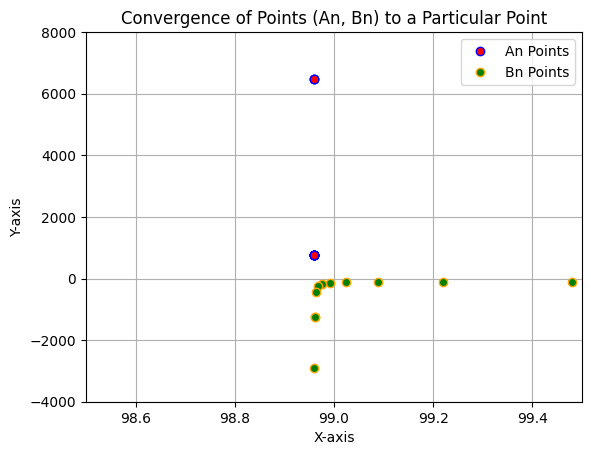

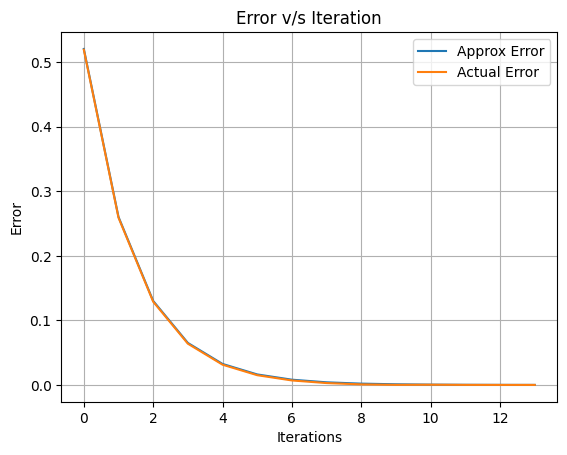


Root closest to 100 = 98.96017545


In [13]:
root = p.find_roots(a=98.959, b=100, method='bisect')
p.converence_plot(root=root, xlimit=(98.5, 99.5), ylimit=(-4000, 8000))
print(f"\nRoot closest to 100 = {root}")

<h2>Machine Epsilon:</h2>
1. Write a function that computes and prints the machine epsilon as defined in the lecture.

In [14]:
machine_epsilon = 1.0
while 1 + machine_epsilon != 1:
    machine_epsilon /= 2
print("Machine Epsilon: ", machine_epsilon)

Machine Epsilon:  1.1102230246251565e-16


2. Generalize your function for any other integer say 'n'. Will the value change? Justify with examples.

In [15]:
machine_epsilons = [1.0] * 1000
n_values = [1.0] * 1000

for n in range(1000):
    machine_epsilon = 1.0
    while n + machine_epsilon != n:
        machine_epsilon /= 2
    machine_epsilons[n] = machine_epsilon
    n_values[n] = n

plt.plot(n_values, machine_epsilons, label="ME = F(n)")
plt.title("Machine Epsilon v/s n")
plt.xlabel("N")
plt.ylabel("Machine Epsilon")
plt.grid()
plt.legend()
plt.show()

<h3>Why does the machine epsilon increases with increase in n?</h3>


<p align='justify'> Machine epsilon m, is defined as fl(1+m) = 1 where m lies in between 0 < m < M. When we use n instead of 1, the machine epsilon is gets multiplied with n, so it is larger for larger n. We will not be able to notice this behaviour because of the approximation that computers perform.

<p align='justify'> Let say, For n = 1 we have machine epsilon = 0.0000000001. It is a very small value comapred to 1 and that is why computer can't tell the difference between 1.0000000001 and 1. But for n = 10000000000, to make a difference between 1 + machine_epsilon and 1 because 10000000000.0000000001 is name as n so to identify the difference n has to be large e.g. 0.1

In [16]:
# %%shell
# jupyter nbconvert --to html /content/CS374_CNM_LAB2.ipynb